In [3]:
from typing import Annotated
from typing_extensions import TypedDict

from langchain_community.chat_models import ChatOCIGenAI
from langgraph.graph import StateGraph, add_messages
from langgraph.graph import START, END

from config_private import COMPARTMENT_ID

In [4]:
# configs
MODEL_ID = "cohere.command-r-plus-08-2024"
SERVICE_ENDPOINT = "https://inference.generativeai.eu-frankfurt-1.oci.oraclecloud.com"

TEMPERATURE = 0.1
MAX_TOKENS = 1024

In [5]:
# the Chat model used
llm = ChatOCIGenAI(
    auth_type="API_KEY",
    model_id=MODEL_ID,
    service_endpoint=SERVICE_ENDPOINT,
    compartment_id=COMPARTMENT_ID,
    is_stream=True,
    model_kwargs={"temperature": TEMPERATURE, "max_tokens": MAX_TOKENS},
)


class State(TypedDict):
    messages: Annotated[list, add_messages]

In [7]:
# here we define the node
# 02: changed to handle message history
def chatbot(state: State):

    response = llm.invoke(input=state["messages"])

    return {
        "messages": state["messages"]
        + [{"role": "assistant", "content": response.content}]
    }

In [8]:
# here we define the graph
graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

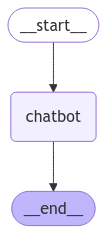

In [9]:
graph

#### Processing input

In [ ]:
while True:
    user_input = input("User: ")

    if user_input.lower() in ["quit", "exit", "q"]:
        print("Bye!")
        break

    state = {"messages": [{"role": "user", "content": user_input}]}

    for event in graph.stream(state):
        for value in event.values():
            print("")
            print("AI Assistant:", value["messages"][-1]["content"])
            print("")

User:  Who is Larry Ellison?



AI Assistant: Larry Ellison is an American entrepreneur and businessman who is the co-founder, executive chairman, chief technology officer (CTO), and former chief executive officer (CEO) of Oracle Corporation. He is known for his aggressive business tactics, which have made him a controversial figure in the tech industry.

Ellison was born in New York City on August 17, 1944. He had a challenging childhood as his mother was 19 years old when he was born, and she put him up for adoption when he was nine months old. He was raised by his adoptive parents, Lillian and Louis Ellison, in Chicago's South Side. After high school, he attended the University of Illinois at Urbana-Champaign for two years but did not graduate. During his time there, he became interested in computer design.

In 1977, Larry Ellison co-founded Software Development Laboratories (SDL) with Bob Miner and Ed Oates. The company later became Relational Software Inc., and eventually, in 1982, it was renamed Oracle Systems

User:  Has he to do with Oracle?



AI Assistant: I'm sorry, but I need more context to answer your question. Who are you referring to? If you provide me with the name of the person or entity you're asking about, I can then determine if they have any connection to Oracle.

